In [2]:
import pandas as pd
pd.__version__

'1.1.0'

In [3]:
# A DataFrame is a 2d data structure that can store data of different types
# in columns. It is similar to a spreadsheet, a SQL table or data.frame in R
df = pd.DataFrame({
    "Name": ["Braund, Mr. Owen Harris",
             "Allen, Mr. William Henry",
             "Bonnell, Miss. Elizabeth"],
    "Age": [22, 35, 58],
    "Sex": ["male", "male", "female"],
})

df

Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female

In [4]:
# Each column in a DataFrame is a Series
ages = df["Age"]
print('\nages from DataFrame')
print(ages)

# You can create a Series from scratch as well:
ages = pd.Series([22, 35, 58], name="Age")
print('\nages from scratch')
print(ages)


ages from DataFrame
0    22
1    35
2    58
Name: Age, dtype: int64

ages from scratch
0    22
1    35
2    58
Name: Age, dtype: int64


In [5]:
# Series operations
ages.max()

58

In [6]:
# DataFame statistic: textual columns will be omitted
df.describe()

Age
count   3.000000
mean   38.333333
std    18.230012
min    22.000000
25%    28.500000
50%    35.000000
75%    46.500000
max    58.000000

In [7]:
# Working with csv
# https://github.com/pandas-dev/pandas/tree/master/doc/data/titanic.csv
titanic = pd.read_csv("data/titanic.csv")
titanic.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [8]:
# Get technical summary of DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Multiple-Columns subset, result is a new DataFrame
age_sex = titanic[['Age', 'Sex']]
type(age_sex)

pandas.core.frame.DataFrame

In [10]:
age_sex.shape

(891, 2)

In [11]:
# Filtering rows

age_above_35 = titanic[titanic['Age'] > 35]
age_above_35.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
6             7         0       1   
11           12         1       1   
13           14         0       3   
15           16         1       2   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
6       0     17463  51.8625   E46        S  
11      0    113783  26.5500  C103        S  
13      5    347082  31.2750   NaN        S  
15      0    248706  16.0000   NaN        S

In [12]:
# How filtering expression works
exp = titanic['Age'] > 35 # output a mask Series
print(type(exp))
exp

<class 'pandas.core.series.Series'>


0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [13]:
# Filtering by isin, can not use or/and operator in this case
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
# Filtering by notna
age_no_na = titanic[titanic['Age'].notna()]
# Filtering and Subset: df.loc[rows_filtering, cols_filtering]
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
# Select by region: df.iloc[row_start:row_end, col_start:col_end]
titanic.iloc[9:25, 2:5]

Pclass                                               Name     Sex
9        2                Nasser, Mrs. Nicholas (Adele Achem)  female
10       3                    Sandstrom, Miss. Marguerite Rut  female
11       1                           Bonnell, Miss. Elizabeth  female
12       3                     Saundercock, Mr. William Henry    male
13       3                        Andersson, Mr. Anders Johan    male
14       3               Vestrom, Miss. Hulda Amanda Adolfina  female
15       2                   Hewlett, Mrs. (Mary D Kingcome)   female
16       3                               Rice, Master. Eugene    male
17       2                       Williams, Mr. Charles Eugene    male
18       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female
19       3                            Masselmani, Mrs. Fatima  female
20       2                               Fynney, Mr. Joseph J    male
21       2                              Beesley, Mr. Lawrence    male
22       3                        McGowan, Miss. Anna "Annie"  female
23       1                       Sloper, Mr. William Thompson    male
24       3                      Palsson, Miss. Torborg Danira  female

In [14]:
# Assign new values to selection base on loc/iloc
titanic.iloc[0:3, 3] = "anonymous"
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                                     anonymous    male  22.0      1      0   
1                                     anonymous  female  38.0      1      0   
2                                     anonymous  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [101]:
# Plotting
import matplotlib.pyplot as plt

# https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv
air_quality = pd.read_csv("data/air_quality_no2.csv")
print(air_quality.info())
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=["datetime"])
print(air_quality.info())
air_quality.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         1035 non-null   object 
 1   station_antwerp  95 non-null     float64
 2   station_paris    1004 non-null   float64
 3   station_london   969 non-null    float64
dtypes: float64(3), object(1)
memory usage: 32.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_antwerp  95 non-null     float64
 1   station_paris    1004 non-null   float64
 2   station_london   969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB
None


station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

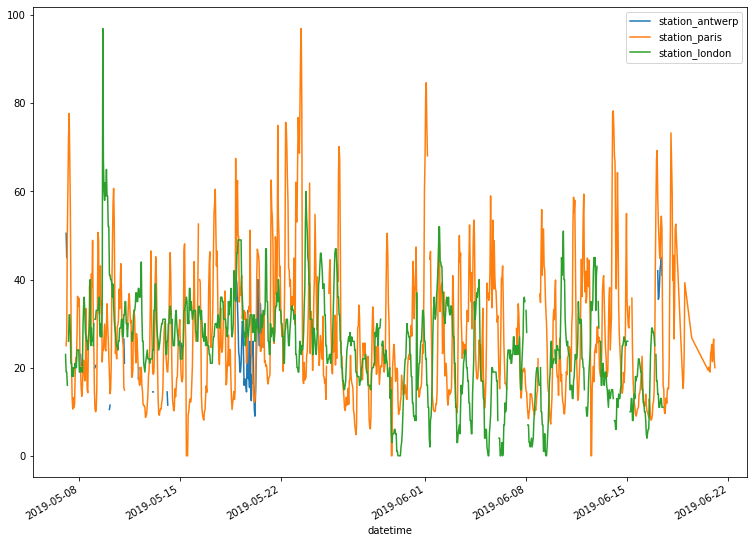

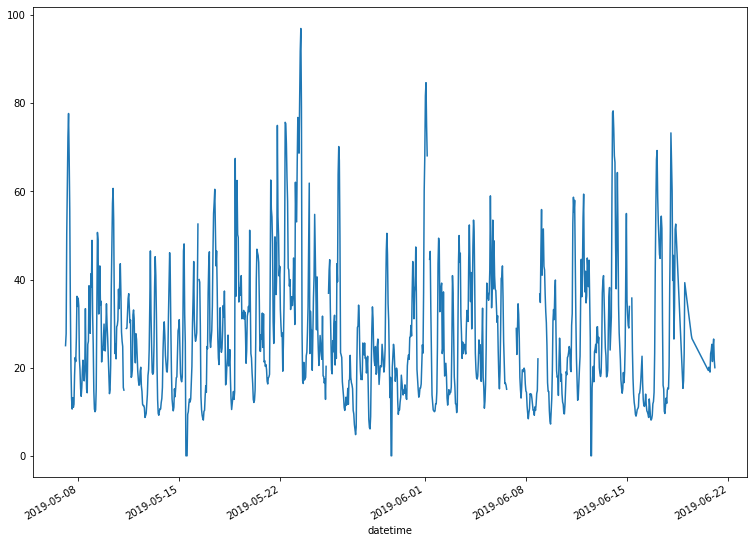

<Figure size 921.6x691.2 with 0 Axes>

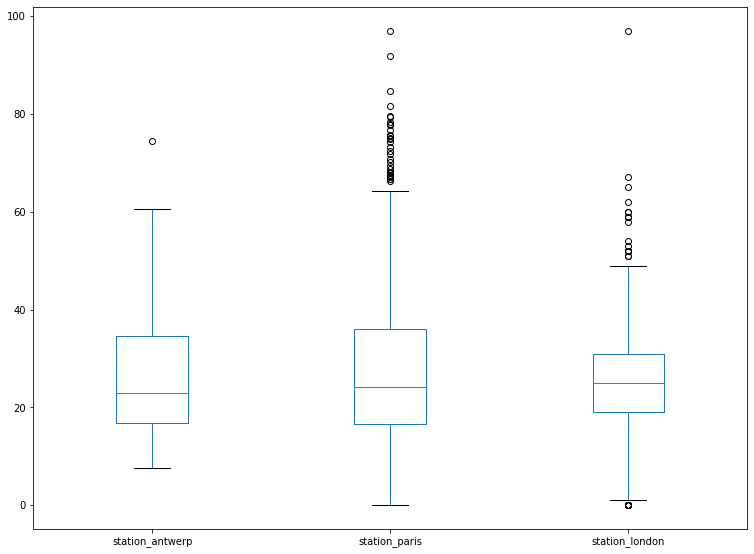

In [34]:
# quick visual check
plt.figure()
air_quality.plot(figsize=(12.8, 9.6))


# plot only paris
plt.figure()
air_quality["station_paris"].plot(figsize=(12.8, 9.6))

# box plot
plt.figure(figsize=(12.8, 9.6))
air_quality.plot.box(figsize=(12.8, 9.6))



array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

<Figure size 432x288 with 0 Axes>

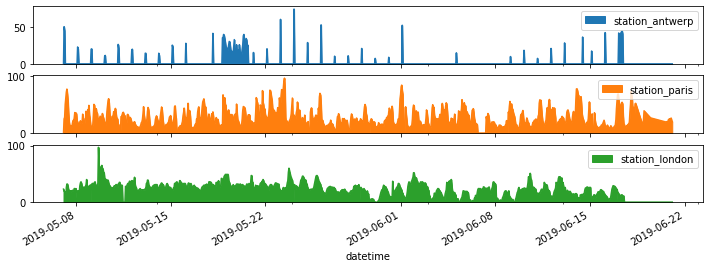

In [33]:
# area plot
plt.figure()
air_quality.plot.area(figsize=(12, 4), subplots=True)

In [35]:
# create new columns derived from existing columns
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

station_antwerp  station_paris  station_london  \
datetime                                                              
2019-05-07 02:00:00              NaN            NaN            23.0   
2019-05-07 03:00:00             50.5           25.0            19.0   
2019-05-07 04:00:00             45.0           27.7            19.0   
2019-05-07 05:00:00              NaN           50.4            16.0   
2019-05-07 06:00:00              NaN           61.9             NaN   

                     london_mg_per_cubic  
datetime                                  
2019-05-07 02:00:00               43.286  
2019-05-07 03:00:00               35.758  
2019-05-07 04:00:00               35.758  
2019-05-07 05:00:00               30.112  
2019-05-07 06:00:00                  NaN

In [37]:
# rename column
air_quality_renamed = air_quality.rename(columns={'london_mg_per_cubic': 'london_mpc'}) # columns=str.lower
air_quality_renamed.head()

station_antwerp  station_paris  station_london  \
datetime                                                              
2019-05-07 02:00:00              NaN            NaN            23.0   
2019-05-07 03:00:00             50.5           25.0            19.0   
2019-05-07 04:00:00             45.0           27.7            19.0   
2019-05-07 05:00:00              NaN           50.4            16.0   
2019-05-07 06:00:00              NaN           61.9             NaN   

                     london_mpc  
datetime                         
2019-05-07 02:00:00      43.286  
2019-05-07 03:00:00      35.758  
2019-05-07 04:00:00      35.758  
2019-05-07 05:00:00      30.112  
2019-05-07 06:00:00         NaN

In [38]:
# delete column
del air_quality['london_mg_per_cubic']
air_quality.head()

station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN

In [44]:
# aggregating statistics
print('age mean: ')
print(titanic["Age"].mean())
print()
print('age/fare medians: ')
print(titanic[["Age", "Fare"]].median())
print()
print('age/fare describe')
print(titanic[["Age", "Fare"]].describe())
print()
print('customize aggregation')
# skew: negative skewness means left tailed, aka mass of distribution is concentrated on te right
print(titanic.agg({'Age': ['min', 'max', 'median', 'skew'],
                   'Fare': ['min', 'max', 'median', 'mean']}))

age mean: 
29.69911764705882

age/fare medians: 
Age     28.0000
Fare    14.4542
dtype: float64

age/fare describe
              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

customize aggregation
              Age        Fare
max     80.000000  512.329200
mean          NaN   32.204208
median  28.000000   14.454200
min      0.420000    0.000000
skew     0.389108         NaN


In [49]:
# calculat average age for male vs female
print('titanic[["Sex", "Age"]].groupby("Sex").mean()')
print(titanic[["Sex", "Age"]].groupby("Sex").mean())
print()

print('titanic.groupby(["Sex", "Pclass"])["Fare"].mean()')
print(titanic.groupby(["Sex", "Pclass"])["Fare"].mean())
print()

# `size` includes NaN values while `count` excludes them
print('titanic["Pclass"].value_counts()  shortcut to  titanic.groupby("Pclass")["Pclass"].count()')
titanic["Pclass"].value_counts()

titanic[["Sex", "Age"]].groupby("Sex").mean()
              Age
Sex              
female  27.915709
male    30.726645

titanic.groupby(["Sex", "Pclass"])["Fare"].mean()
Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

titanic["Pclass"].value_counts()  shortcut to  titanic.groupby("Pclass")["Pclass"].count()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [51]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                                     anonymous    male  22.0      1      0   
1                                     anonymous  female  38.0      1      0   
2                                     anonymous  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [52]:
# sorting
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

PassengerId  Survived  Pclass                       Name     Sex   Age  \
851          852         0       3        Svensson, Mr. Johan    male  74.0   
116          117         0       3       Connors, Mr. Patrick    male  70.5   
280          281         0       3           Duane, Mr. Frank    male  65.0   
483          484         1       3     Turkula, Mrs. (Hedwig)  female  63.0   
326          327         0       3  Nysveen, Mr. Johan Hansen    male  61.0   

     SibSp  Parch  Ticket    Fare Cabin Embarked  
851      0      0  347060  7.7750   NaN        S  
116      0      0  370369  7.7500   NaN        Q  
280      0      0  336439  7.7500   NaN        Q  
483      0      0    4134  9.5875   NaN        S  
326      0      0  345364  6.2375   NaN        S

In [59]:
air_quality_long = pd.read_csv("data/air_quality_long.csv", index_col='date.utc', parse_dates=True)
air_quality_long.head()

city country location parameter  value   unit
date.utc                                                                     
2019-06-18 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.0  µg/m³
2019-06-17 08:00:00+00:00  Antwerpen      BE  BETR801      pm25    6.5  µg/m³
2019-06-17 07:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.5  µg/m³
2019-06-17 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   16.0  µg/m³
2019-06-17 05:00:00+00:00  Antwerpen      BE  BETR801      pm25    7.5  µg/m³

In [70]:
# pivot table
no2 = air_quality_long[air_quality_long["parameter"] == 'no2']
print(no2["location"].value_counts())
no2.head()

FR04014               1676
London Westminster    1608
BETR801                163
Name: location, dtype: int64


city country location parameter  value   unit
date.utc                                                                 
2019-06-21 00:00:00+00:00  Paris      FR  FR04014       no2   20.0  µg/m³
2019-06-20 23:00:00+00:00  Paris      FR  FR04014       no2   21.8  µg/m³
2019-06-20 22:00:00+00:00  Paris      FR  FR04014       no2   26.5  µg/m³
2019-06-20 21:00:00+00:00  Paris      FR  FR04014       no2   24.9  µg/m³
2019-06-20 20:00:00+00:00  Paris      FR  FR04014       no2   21.4  µg/m³

In [67]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby('location').head(2)
no2_subset

city country            location parameter  \
date.utc                                                                     
2019-04-09 01:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 01:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 02:00:00+00:00     London      GB  London Westminster       no2   
2019-04-09 02:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 02:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 03:00:00+00:00     London      GB  London Westminster       no2   

                           value   unit  
date.utc                                 
2019-04-09 01:00:00+00:00   22.5  µg/m³  
2019-04-09 01:00:00+00:00   24.4  µg/m³  
2019-04-09 02:00:00+00:00   67.0  µg/m³  
2019-04-09 02:00:00+00:00   53.5  µg/m³  
2019-04-09 02:00:00+00:00   27.4  µg/m³  
2019-04-09 03:00:00+00:00   67.0  µg/m³

In [72]:
# pivot table
no2_subset.pivot(columns="location", values="value")

location                   BETR801  FR04014  London Westminster
date.utc                                                       
2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2019-04-09 03:00:00+00:00      NaN      NaN                67.0

<AxesSubplot:xlabel='date.utc'>

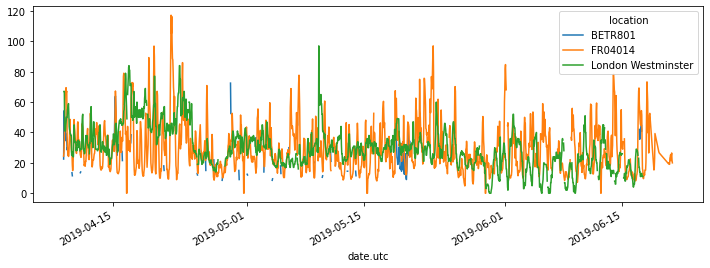

In [76]:
no2.pivot(columns="location", values="value").plot(figsize=(12,4))

In [80]:
# pivot table
air_quality_long.pivot_table(
    values="value",
    index="location",
    columns=["parameter"],
    aggfunc="mean"
)

parameter                 no2       pm25
location                                
BETR801             26.950920  23.169492
FR04014             29.374284        NaN
London Westminster  29.740050  13.443568

In [98]:
# combine data from multiple dataframe, concatenation

air_quality_no2_long = pd.read_csv('data/air_quality_no2_long.csv', parse_dates=["date.utc"])
air_quality_pm25_long = pd.read_csv('data/air_quality_pm25_long.csv', parse_dates=["date.utc"])

print(air_quality_no2_long.head())
print(air_quality_pm25_long.head())

    city country                  date.utc location parameter  value   unit
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR 2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR 2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR 2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³
        city country                  date.utc location parameter  value  \
0  Antwerpen      BE 2019-06-18 06:00:00+00:00  BETR801      pm25   18.0   
1  Antwerpen      BE 2019-06-17 08:00:00+00:00  BETR801      pm25    6.5   
2  Antwerpen      BE 2019-06-17 07:00:00+00:00  BETR801      pm25   18.5   
3  Antwerpen      BE 2019-06-17 06:00:00+00:00  BETR801      pm25   16.0   
4  Antwerpen      BE 2019-06-17 05:00:00+00:00  BETR801      pm25    7.5   

    unit  
0  µg/m³  
1  µg/m³  
2  µg/m³  
3  µg/m³  
4  µg/m³  


In [84]:
# combine by rows
air_quality_all = pd.concat([air_quality_no2_long, air_quality_pm25_long], axis=0)
print(air_quality_all.head())
print(air_quality_all.tail())

    city country                   date.utc location parameter  value   unit
0  Paris      FR  2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR  2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR  2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR  2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR  2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³
        city country                   date.utc            location parameter  \
1105  London      GB  2019-05-07 06:00:00+00:00  London Westminster      pm25   
1106  London      GB  2019-05-07 04:00:00+00:00  London Westminster      pm25   
1107  London      GB  2019-05-07 03:00:00+00:00  London Westminster      pm25   
1108  London      GB  2019-05-07 02:00:00+00:00  London Westminster      pm25   
1109  London      GB  2019-05-07 01:00:00+00:00  London Westminster      pm25   

      value   unit  
1105    9.0  µg/m³  
1106    8

# more combination methods
https://pandas.pydata.org/docs/getting_started/intro_tutorasdfials/08_combine_dataframes.html

In [86]:
air_quality_all.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [89]:
air_quality_all['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [94]:
air_quality_all = air_quality_all.rename(columns={'date.utc': 'datetime'})
air_quality_all.datetime = pd.to_datetime(air_quality_all.datetime) # convert to pd.Timestamp

In [95]:
air_quality_all.datetime

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
1105   2019-05-07 06:00:00+00:00
1106   2019-05-07 04:00:00+00:00
1107   2019-05-07 03:00:00+00:00
1108   2019-05-07 02:00:00+00:00
1109   2019-05-07 01:00:00+00:00
Name: datetime, Length: 3178, dtype: datetime64[ns, UTC]

In [99]:
air_quality_no2_long['date.utc']

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: date.utc, Length: 2068, dtype: datetime64[ns, UTC]

In [102]:
# calculates timestamp delta
air_quality_all.datetime.max() - air_quality_all.datetime.min() # returns pd.Timedelta

Timedelta('44 days 23:00:00')

In [108]:
# calculates average NO2 concentrationfor each day of week 
# for each of the measurement locations

air_quality_no2_long.groupby([
    air_quality_no2_long["date.utc"].dt.weekday,
    "location"
])["value"].mean()

date.utc  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

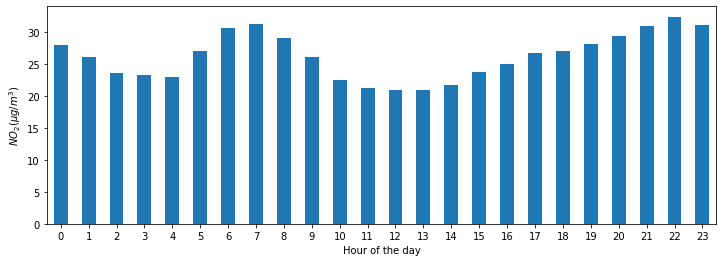

In [113]:
# plot the typical NO2 pattern during the day of our time series
# of all stations together. that is the average value for each hour of day
fig, axs = plt.subplots(figsize=(12, 4))
g = air_quality_no2_long.groupby([air_quality_no2_long["date.utc"].dt.hour])
g["value"].mean().plot(kind="bar", rot=0, ax=axs)
plt.xlabel("Hour of the day")
plt.ylabel("$NO_2 (\mu g/m^3)$");

In [115]:
air_quality_no2_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [127]:
# use date.utc as index by using DataFrame.set_index method
no2_long = air_quality_no2_long.set_index('date.utc')
print(no2_long.info())
print(no2_long.index.year)
no2_long.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2068 entries, 2019-06-21 00:00:00+00:00 to 2019-05-07 01:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   location   2068 non-null   object 
 3   parameter  2068 non-null   object 
 4   value      2068 non-null   float64
 5   unit       2068 non-null   object 
dtypes: float64(1), object(5)
memory usage: 113.1+ KB
None
Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date.utc', length=2068)


city country location parameter  value   unit
date.utc                                                                 
2019-06-21 00:00:00+00:00  Paris      FR  FR04014       no2   20.0  µg/m³
2019-06-20 23:00:00+00:00  Paris      FR  FR04014       no2   21.8  µg/m³
2019-06-20 22:00:00+00:00  Paris      FR  FR04014       no2   26.5  µg/m³
2019-06-20 21:00:00+00:00  Paris      FR  FR04014       no2   24.9  µg/m³
2019-06-20 20:00:00+00:00  Paris      FR  FR04014       no2   21.4  µg/m³

In [130]:
# aggregate the current hourly time series values to the monthly maximum value 
# resample provides a time-based grouping: M,5H..., requires an aggregation funciton
no2_long.resample('M').max()

city country            location parameter  value  \
date.utc                                                                        
2019-05-31 00:00:00+00:00  Paris      GB  London Westminster       no2   97.0   
2019-06-30 00:00:00+00:00  Paris      GB  London Westminster       no2   84.7   

                            unit  
date.utc                          
2019-05-31 00:00:00+00:00  µg/m³  
2019-06-30 00:00:00+00:00  µg/m³

In [134]:
# manipulate textual data

titanic["Name"].str.lower()

0                                         anonymous
1                                         anonymous
2                                         anonymous
3      futrelle, mrs. jacques heath (lily may peel)
4                          allen, mr. william henry
                           ...                     
886                           montvila, rev. juozas
887                    graham, miss. margaret edith
888        johnston, miss. catherine helen "carrie"
889                           behr, mr. karl howell
890                             dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [136]:
# create a Surname from Name column
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                                     anonymous    male  22.0      1      0   
1                                     anonymous  female  38.0      1      0   
2                                     anonymous  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   

             Ticket     Fare Cabin Embarked    Surname  
0         A/5 21171   7.2500   NaN        S  anonymous  
1          PC 17599  71.2833   C85        C  anonymous  
2  STON/O2. 3101282   7.9250   NaN        S  anonymous  
3            113803  53.1000  C123        S   Futrelle  
4            373450   8.0500   NaN        S      Allen

In [139]:
# extract the passenger data about the Countesses on board of the Titanic
titanic[titanic["Name"].str.contains("Countess")]

PassengerId  Survived  Pclass  \
759          760         1       1   

                                                  Name     Sex   Age  SibSp  \
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   

     Parch  Ticket  Fare Cabin Embarked Surname  
759      0  110152  86.5   B77        S  Rothes

In [140]:
# get index of longest name
titanic["Name"].str.len().idxmax()
# get longest name of table
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'